# **Ridge Waveguide Simulation**

### **Kondisi Awal Sebelum Dipengaruhi Suhu**

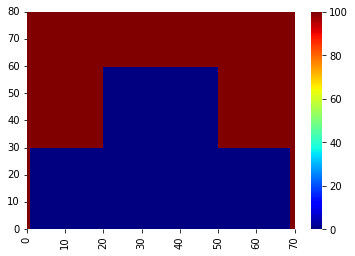

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# parameter awal
m  = 10**(-6)
nc = 1.000293
ni = 2.65
ns = 1.489
dx = 1*m
dy = 1*m
t1 = 20*m
t  = 30*m # ini d
t2 = 30*m
H  = t1 + t + t2
l  = 20*m
w  = 30*m
L  = l + w + l
kl = 0.17 
C  = 1.3
tocf = 1.7e-4
nx = int(L/dx)
ny = int(H/dy)
x1 = int(l/dx)     
x2 = int((l+w)/dx)
x3 = int(nx)       
y1 = int(t2/dy)    
y2 = int((t2+t)/dy)
y3 = int(ny)
a = kl/2
b = dy/dx
c = dx/dy
k = kl*b     
T  = np.zeros((ny, nx))  # array kosong
n  = np.zeros((ny, nx))
dn = np.zeros((ny, nx))
T0 = 100

# kondisi suhu awal
# sisi atas core
for j in range(x1, x2):
  i = y2
  T[i, j] = T0

# sisi atas kiri substrat
for j in range(x1):
  i = y1
  T[i, j] = T0

# sisi atas kanan substrat
for j in range(x2, nx):
  i = y1
  T[i, j] = T0

# sisi kanan core
for i in range(y1, y2):
  j = x2
  T[i, j] = T0 

# cladding bottom plate
for j in range(0, nx):
  i = 0
  T[i, j] = 0

# cladding atas
for i in range(y2, y3):
  for j in range(x3):
   T[i, j] = T0

# cladding kiri
for i in range(y1, y2):
  for j in range(x1):
    T[i, j] = T0

# cladding kanan
for i in range(y1, y2):
   for j in range(x2, x3):
     T[i, j] = T0

for i in range(y1):
  T[i, 0] = T0
  T[i, -1] = T0 

# plotting
yticklabels = np.arange(0, ny+10, 10)
xticklabels = np.arange(0, nx+10, 10)
yticks = np.arange(0, ny+10, 10)
xticks = np.arange(0, nx+10, 10)
ax = sns.heatmap(T, cmap="jet", yticklabels=yticklabels, 
                 xticklabels=xticklabels)
ax.invert_yaxis() 
ax.set_yticks(yticks)
ax.set_xticks(xticks)
plt.show()

### **Aplikasi Metode Beda Hingga**

In [ ]:
# penerapan metode beda hingga
def fdm(u, max_iter=1000):
  """
  Menghitung turunan kedua dengan metode beda hingga (finite diference method).
  Parameters
  ----------
  T : array 2 dimensi
  max_iter : banyak iterasi yang diinginkan. Default = 1000  iterasi

  """
  size = u.shape
  x = size[1]
  y = size[0]
  for k in range(max_iter):
    for i in range(1, y-1):
      for j in range(1, x-1):
        u[i, j] = 1/4 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1])
  return u

### **Kondisi Setelah Dipengaruhi Suhu**

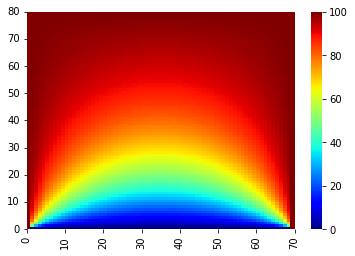

In [ ]:
# perhitungan dengan 10000 iterasi
T = fdm(T, max_iter = 10000)

# plotting
yticklabels = np.arange(0, ny+10, 10)
xticklabels = np.arange(0, nx+10, 10)
yticks = np.arange(0, ny+10, 10)
xticks = np.arange(0, nx+10, 10)
ax = sns.heatmap(T, cmap="jet", yticklabels=yticklabels, 
                 xticklabels=xticklabels)
ax.invert_yaxis() 
ax.set_yticks(yticks)
ax.set_xticks(xticks)
plt.show()

### **Distribusi Suhu pada Garis Tengah Waveguide**



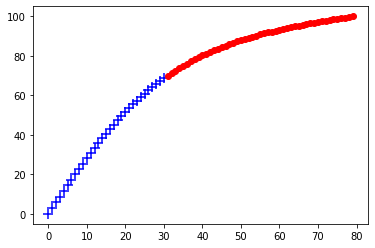

In [ ]:
tengah = int(nx/2)
for i in range(ny):
  if i <= y1:
    plt.scatter(i, T[i, tengah], marker="+", s=100, color="b")
  else:
    plt.scatter(i, T[i, tengah], color="r")
plt.show()

### **Simulasi Distribusi Indeks Bias**

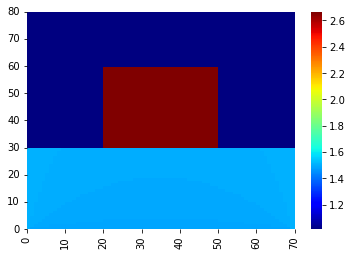

In [ ]:
for i in range(ny):
  for j in range(nx):
    dn[i, j] = T[i, j] * tocf 

# distribusi n
# n substrat
for j in range(x3):
   for i in range(y1):
     n[i, j] = ns + dn[i, j]

# n cladding kiri
for j in range(x1):
   for i in range(y1, y2):
      n[i, j] = nc + dn[i,j]

# n core 
for j in range(x1, x2):
   for i in range(y1, y2):
      n[i, j] = ni + dn[i, j]

# n cladding atas
for j in range(nx):
  for i in range(y2, y3):
     n[i, j] = nc + dn[i, j]

# n cladding kanan
for j in range(x2, nx):
   for i in range(y1, y2):
      n[i, j] = nc + dn[i, j]

# plotting
yticklabels = np.arange(0, ny+10, 10)
xticklabels = np.arange(0, nx+10, 10)
yticks = np.arange(0, ny+10, 10)
xticks = np.arange(0, nx+10, 10)
ax = sns.heatmap(n, cmap="jet", yticklabels=yticklabels, 
                 xticklabels=xticklabels)
ax.invert_yaxis() 
ax.set_yticks(yticks)
ax.set_xticks(xticks)
plt.show()

### **Distribusi n pada Garis Tengah Waveguide**

### **Bagian inti**

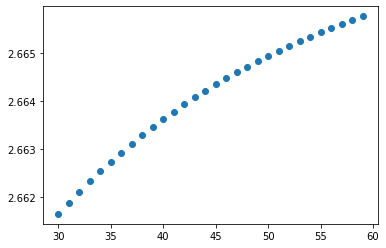

In [ ]:
plt.scatter(range(y1, y2), n[y1:y2, tengah])
plt.show()

### **Bagian substrat**

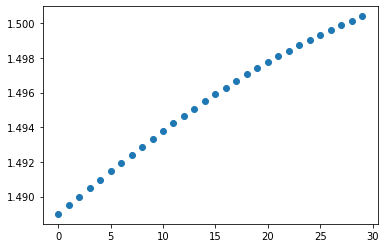

In [ ]:
tengah = int(nx/2)
plt.scatter(range(y1), n[:y1, tengah])
plt.show()

### **Simulasi Distribusi Medan Listrik**

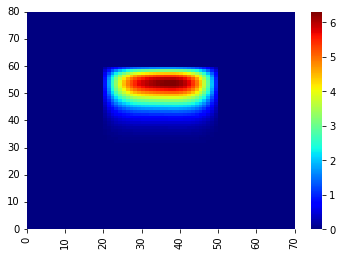

In [ ]:
lamda = 1.55*m
pi = 3.14
ko = (2*pi)/lamda
beta = ko*ni
beta1 = 0
selisih = abs(beta-beta1)
E = np.zeros((ny, nx))
E[2:ny-1, 2:nx-1] = 1
inti = 0

while selisih > 1:
  num = 0
  den = 0
  for i in range(2, ny-1):
    for j in range(2, nx-1):
      atas = E[i-1, j] + E[i+1, j] + (E[i, j-1] + E[i, j+1]) * (dx**2)/(dy**2)
      bawah1 = 2 * (1 + (dx**2)/(dy**2))
      bawah2 = dx**2 * ((ko**2 * n[i, j]**2)-(beta**2))
      bawah = bawah1 - bawah2
      E[i, j] = atas/bawah
  for i in range(2, ny-1):
    for j in range(2, nx-1):
      ex = (E[i+1, j] + E[i-1, j] - 2*E[i, j]) / dx**2
      ey = (E[i, j+1] + E[i, j-1] - 2*E[i, j]) / dy**2
      exy = (ko**2) * (n[i, j]**2) * (E[i, j]**2)
      num = num + (E[i, j] * (ex+ey) + exy)
      den = den + E[i, j]**2
      beta1 = np.sqrt(num/den)
  selisih = abs(beta1-beta)
  beta = beta1
  inti += 1

# plotting
yticklabels = np.arange(0, ny+10, 10)
xticklabels = np.arange(0, nx+10, 10)
yticks = np.arange(0, ny+10, 10)
xticks = np.arange(0, nx+10, 10)
ax = sns.heatmap(E, cmap="jet", yticklabels=yticklabels, 
                 xticklabels=xticklabels)
ax.invert_yaxis() 
ax.set_yticks(yticks)
ax.set_xticks(xticks)
plt.show()